In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [18]:
sales_df = pd.read_csv("/Users/anastasia/Downloads/custom_sales_data_v2.csv")
customer_df = pd.read_csv("/Users/anastasia/Downloads/customer_data_v2.csv")

In [20]:
%matplotlib inline

In [22]:
print(f"Sales Data:\n")
display(sales_df.head())
print(f"Customer Data:\n")
display(customer_df.head())

Sales Data:



,Product_ID,Product_Name,Category,Subcategory,Region,Country,Units_Sold,Revenue,Profit,Order_Date,Ship_Date,Customer_ID
0,P0001,Product 1,Office Supplies,Paper,North America,Mexico,141,18330.00,1555.93,2023-02-22,2023-03-05,CUST095
1,P0002,Product 2,Office Supplies,Paper,Africa,South Africa,17,418.20,43.77,2023-09-16,2023-09-26,CUST004
2,P0003,Product 3,Office Supplies,Paper,Africa,South Africa,113,26002.43,3108.53,2023-01-04,2023-01-17,CUST021
3,P0004,Product 4,Office Supplies,Binders,Asia,Japan,80,9240.00,2225.67,2023-02-22,2023-02-24,CUST049
4,P0005,Product 5,Electronics,Laptops,Asia,India,136,55146.64,12817.90,2023-10-02,2023-10-04,CUST049


Customer Data:



,Customer_ID,Customer_Name,Customer_Segment,Region,Customer_Satisfaction,Account_Manager
0,CUST001,Customer 1,Home Office,Europe,3,Manager B
1,CUST002,Customer 2,Home Office,Europe,5,Manager C
2,CUST003,Customer 3,Home Office,Europe,5,Manager A
3,CUST004,Customer 4,Small Business,Asia,2,Manager C
4,CUST005,Customer 5,Home Office,Asia,2,Manager C


In [24]:
merged_df = pd.merge(sales_df, customer_df, on="Customer_ID", how="inner", suffixes=("_sales", "_customer"))
display(merged_df.head())

,Product_ID,Product_Name,Category,Subcategory,Region_sales,Country,Units_Sold,Revenue,Profit,Order_Date,Ship_Date,Customer_ID,Customer_Name,Customer_Segment,Region_customer,Customer_Satisfaction,Account_Manager
0,P0001,Product 1,Office Supplies,Paper,North America,Mexico,141,18330.00,1555.93,2023-02-22,2023-03-05,CUST095,Customer 95,Home Office,Europe,3,Manager C
1,P0002,Product 2,Office Supplies,Paper,Africa,South Africa,17,418.20,43.77,2023-09-16,2023-09-26,CUST004,Customer 4,Small Business,Asia,2,Manager C
2,P0003,Product 3,Office Supplies,Paper,Africa,South Africa,113,26002.43,3108.53,2023-01-04,2023-01-17,CUST021,Customer 21,Small Business,Asia,4,Manager C
3,P0004,Product 4,Office Supplies,Binders,Asia,Japan,80,9240.00,2225.67,2023-02-22,2023-02-24,CUST049,Customer 49,Home Office,North America,4,Manager C
4,P0005,Product 5,Electronics,Laptops,Asia,India,136,55146.64,12817.90,2023-10-02,2023-10-04,CUST049,Customer 49,Home Office,North America,4,Manager C


In [26]:
segment_summary = merged_df.groupby("Customer_Segment")[["Revenue", "Profit"]].mean()
print("Average Revenue and Profit by Customer Segment:")
display(segment_summary)

Average Revenue and Profit by Customer Segment:


,Revenue,Profit
Customer_Segment,,
Consumer,59866.975874,10730.913680
Corporate,67315.673472,11849.006991
Home Office,67212.323089,11253.702819
Small Business,68503.963125,12123.514141


In [28]:
satisfaction_by_region = merged_df.groupby("Region_customer")["Customer_Satisfaction"].mean().sort_values(ascending=False)
print("Average Customer Satisfaction by Region:\n")
display(satisfaction_by_region)

Average Customer Satisfaction by Region:



Region_customer
Asia             3.484277
South America    2.820106
Europe           2.660256
North America    2.621053
Africa           2.402844
Name: Customer_Satisfaction, dtype: float64

In [79]:
top_customers = merged_df.groupby("Customer_Name")["Revenue"].sum().sort_values(ascending=False).head(10)
print("Top 5 Customers\n")
display(top_customers)

Top 5 Customers



Customer_Name
Customer 24    1297738.59
Customer 91    1290564.30
Customer 61    1287579.75
Customer 15    1232951.00
Customer 59    1119112.88
Customer 64    1041760.66
Customer 83    1038594.00
Customer 6     1021349.40
Customer 69    1019768.95
Customer 89     985598.05
Name: Revenue, dtype: float64

In [95]:
top_customer_names = top_customers.index
top_customer_data = merged_df[merged_df["Customer_Name"].isin(top_customer_names)]
print("Detailed Information for Top 5 Most Profitable Customers:")
display(top_customer_data[["Customer_Name", "Revenue", "Profit", "Customer_Segment"]])

Detailed Information for Top 5 Most Profitable Customers:


,Customer_Name,Revenue,Profit,Customer_Segment
6,Customer 59,17593.51,4690.80,Small Business
8,Customer 89,48605.04,8047.30,Small Business
14,Customer 15,123996.48,14471.17,Small Business
18,Customer 69,23566.15,5490.37,Home Office
23,Customer 61,20727.91,5884.21,Corporate
...,...,...,...,...
939,Customer 69,24627.75,3914.51,Home Office
942,Customer 64,16901.70,3858.21,Corporate
945,Customer 64,4661.25,988.53,Corporate
957,Customer 61,106218.84,25732.39,Corporate


In [101]:
# Convert columns to datetime format if not already
merged_df["Order_Date"] = pd.to_datetime(merged_df["Order_Date"])
merged_df["Ship_Date"] = pd.to_datetime(merged_df["Ship_Date"])

In [105]:
# Extract year, month, and day for analysis
merged_df["Order_Year"] = merged_df["Order_Date"].dt.year
merged_df["Order_Month"] = merged_df["Order_Date"].dt.month

In [145]:
monthly_revenue = merged_df.set_index("Order_Date").resample("ME")["Revenue"].sum()
print(f"Monthly Revenue:\n\n{monthly_revenue}")

Monthly Revenue:

Order_Date
2023-01-31    6576179.60
2023-02-28    3981804.77
2023-03-31    7421542.52
2023-04-30    3862090.95
2023-05-31    5539589.37
2023-06-30    4682149.40
2023-07-31    4508652.97
2023-08-31    6144151.65
2023-09-30    5304299.33
2023-10-31    5513877.66
2023-11-30    5348833.66
2023-12-31    6706236.34
Freq: ME, Name: Revenue, dtype: float64


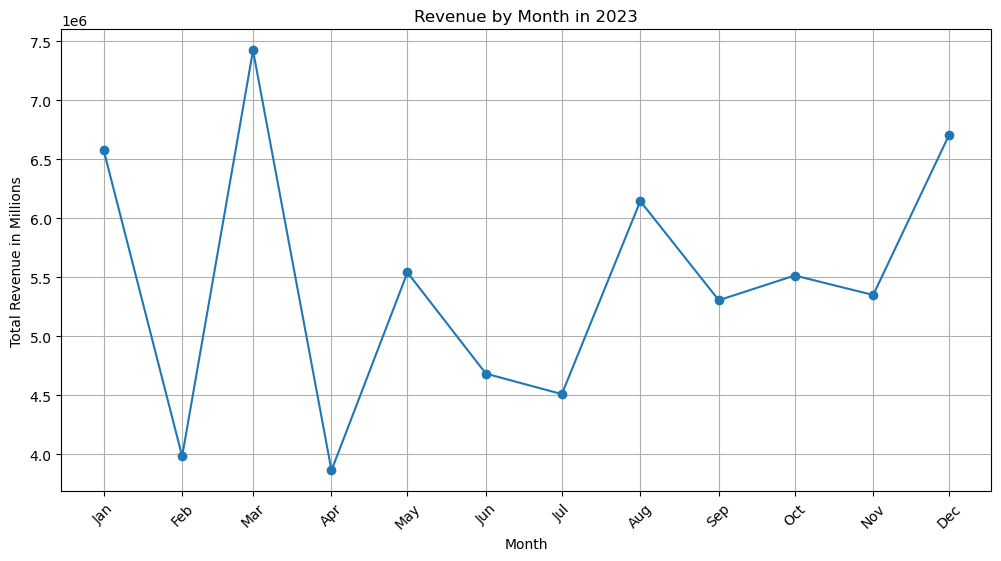

In [143]:
monthly_revenue.sort_index()
monthly_revenue.index = monthly_revenue.index - pd.offsets.MonthBegin(1)
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o", linestyle="-")
plt.title("Revenue by Month in 2023")
plt.xlabel("Month")
plt.ylabel("Total Revenue in Millions")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))

In [153]:
multi_index_df = merged_df.set_index(["Customer_Segment", "Region_customer"])
display(multi_index_df)

Product_ID  Product_Name         Category  \
Customer_Segment Region_customer                                             
Home Office      Europe               P0001     Product 1  Office Supplies   
Small Business   Asia                 P0002     Product 2  Office Supplies   
                 Asia                 P0003     Product 3  Office Supplies   
Home Office      North America        P0004     Product 4  Office Supplies   
                 North America        P0005     Product 5      Electronics   
...                                     ...           ...              ...   
Consumer         North America        P0996   Product 996        Furniture   
Home Office      Asia                 P0997   Product 997  Office Supplies   
Consumer         Africa               P0998   Product 998      Electronics   
                 Africa               P0999   Product 999      Electronics   
Small Business   Africa               P1000  Product 1000        Furniture   

                                  Subcategory   Region_sales       Country  \
Customer_Segment Region_customer                                             
Home Office      Europe                 Paper  North America        Mexico   
Small Business   Asia                   Paper         Africa  South Africa   
                 Asia                   Paper         Africa  South Africa   
Home Office      North America        Binders           Asia         Japan   
                 North America        Laptops           Asia         India   
...                                       ...            ...           ...   
Consumer         North America         Chairs         Africa       Nigeria   
Home Office      Asia                 Binders         Africa  South Africa   
Consumer         Africa                Phones  North America        Canada   
                 Africa           Accessories         Africa  South Africa   
Small Business   Africa              Cabinets  North America           USA   

                                  Units_Sold    Revenue    Profit Order_Date  \
Customer_Segment Region_customer                                               
Home Office      Europe                  141   18330.00   1555.93 2023-02-22   
Small Business   Asia                     17     418.20     43.77 2023-09-16   
                 Asia                    113   26002.43   3108.53 2023-01-04   
Home Office      North America            80    9240.00   2225.67 2023-02-22   
                 North America           136   55146.64  12817.90 2023-10-02   
...                                      ...        ...       ...        ...   
Consumer         North America           401  194196.28  27833.44 2023-03-28   
Home Office      Asia                     22     230.78     38.35 2023-11-14   
Consumer         Africa                  140   42414.40  11022.31 2023-07-14   
                 Africa                   24    2138.16    392.40 2023-02-05   
Small Business   Africa                  372  105153.24  12604.15 2023-08-10   

                                  Ship_Date Customer_ID Customer_Name  \
Customer_Segment Region_customer                                        
Home Office      Europe          2023-03-05     CUST095   Customer 95   
Small Business   Asia            2023-09-26     CUST004    Customer 4   
                 Asia            2023-01-17     CUST021   Customer 21   
Home Office      North America   2023-02-24     CUST049   Customer 49   
                 North America   2023-10-04     CUST049   Customer 49   
...                                     ...         ...           ...   
Consumer         North America   2023-04-10     CUST032   Customer 32   
Home Office      Asia            2023-11-19     CUST084   Customer 84   
Consumer         Africa          2023-07-20     CUST081   Customer 81   
                 Africa          2023-02-10     CUST012   Customer 12   
Small Business   Africa          2023-08-14     CUST079   Customer 79   

            

In [165]:
consumer_north_america = multi_index_df.loc[("Consumer", "North America")]
display(consumer_north_america)

/var/folders/68/p6tbj3yj42n58fkdzr4c1br00000gn/T/ipykernel_86350/306808984.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  consumer_north_america = multi_index_df.loc[("Consumer", "North America")]


Product_ID Product_Name         Category  \
Customer_Segment Region_customer                                            
Consumer         North America        P0014   Product 14      Electronics   
                 North America        P0036   Product 36  Office Supplies   
                 North America        P0083   Product 83  Office Supplies   
                 North America        P0089   Product 89        Furniture   
                 North America        P0099   Product 99  Office Supplies   
...                                     ...          ...              ...   
                 North America        P0859  Product 859  Office Supplies   
                 North America        P0935  Product 935        Furniture   
                 North America        P0977  Product 977      Electronics   
                 North America        P0984  Product 984      Electronics   
                 North America        P0996  Product 996        Furniture   

                                  Subcategory   Region_sales    Country  \
Customer_Segment Region_customer                                          
Consumer         North America    Accessories  South America   Colombia   
                 North America          Paper  North America     Mexico   
                 North America        Binders  South America  Argentina   
                 North America         Chairs  North America     Mexico   
                 North America          Paper  South America   Colombia   
...                                       ...            ...        ...   
                 North America           Pens  South America  Argentina   
                 North America         Tables         Africa      Egypt   
                 North America    Accessories         Europe    Germany   
                 North America    Accessories  South America   Colombia   
                 North America         Chairs         Africa    Nigeria   

                                  Units_Sold    Revenue    Profit Order_Date  \
Customer_Segment Region_customer                                               
Consumer         North America            33    6551.82   1303.63 2023-08-28   
                 North America           110   28366.80   2357.68 2023-06-28   
                 North America           406    7490.70    925.54 2023-07-27   
                 North America           146   35040.00   5610.51 2023-04-05   
                 North America           166   50766.12   2866.57 2023-04-28   
...                                      ...        ...       ...        ...   
                 North America           262   38424.92   9298.83 2023-02-25   
                 North America           233   88796.30  14428.24 2023-05-16   
                 North America           243    6313.14    563.19 2023-10-14   
                 North America           143   46689.50  12442.21 2023-12-29   
                 North America           401  194196.28  27833.44 2023-03-28   

                                  Ship_Date Customer_ID Customer_Name  \
Customer_Segment Region_customer                                        
Consumer         North America   2023-09-06     CUST033   Customer 33   
                 North America   2023-06-30     CUST032   Customer 32   
                 North America   2023-08-08     CUST032   Customer 32   
                 North America   2023-04-06     CUST033   Customer 33   
                 North America   2023-05-09     CUST074   Customer 74   
...                                     ...         ...           ...   
                 North America   2023-02-27     CUST033   Customer 33   
                 North America   2023-05-22     CUST024   Customer 24   
                 North America   2023-10-20     CUST016   Customer 16   
                 North America   2023-12-30     CUST074   Customer 74   
                 North America   2023-04-10     CUST032   Customer 32   

                                  Customer_Satisfaction Account_

In [173]:
print(multi_index_df.columns)


Index(['Product_ID', 'Product_Name', 'Category', 'Subcategory', 'Region_sales',
       'Country', 'Units_Sold', 'Revenue', 'Profit', 'Order_Date', 'Ship_Date',
       'Customer_ID', 'Customer_Name', 'Customer_Satisfaction',
       'Account_Manager', 'Order_Year', 'Order_Month'],
      dtype='object')


In [175]:
display(multi_index_df.head())

Product_ID Product_Name         Category  \
Customer_Segment Region_customer                                            
Home Office      Europe               P0001    Product 1  Office Supplies   
Small Business   Asia                 P0002    Product 2  Office Supplies   
                 Asia                 P0003    Product 3  Office Supplies   
Home Office      North America        P0004    Product 4  Office Supplies   
                 North America        P0005    Product 5      Electronics   

                                 Subcategory   Region_sales       Country  \
Customer_Segment Region_customer                                            
Home Office      Europe                Paper  North America        Mexico   
Small Business   Asia                  Paper         Africa  South Africa   
                 Asia                  Paper         Africa  South Africa   
Home Office      North America       Binders           Asia         Japan   
                 North America       Laptops           Asia         India   

                                  Units_Sold   Revenue    Profit Order_Date  \
Customer_Segment Region_customer                                              
Home Office      Europe                  141  18330.00   1555.93 2023-02-22   
Small Business   Asia                     17    418.20     43.77 2023-09-16   
                 Asia                    113  26002.43   3108.53 2023-01-04   
Home Office      North America            80   9240.00   2225.67 2023-02-22   
                 North America           136  55146.64  12817.90 2023-10-02   

                                  Ship_Date Customer_ID Customer_Name  \
Customer_Segment Region_customer                                        
Home Office      Europe          2023-03-05     CUST095   Customer 95   
Small Business   Asia            2023-09-26     CUST004    Customer 4   
                 Asia            2023-01-17     CUST021   Customer 21   
Home Office      North America   2023-02-24     CUST049   Customer 49   
                 North America   2023-10-04     CUST049   Customer 49   

                                  Customer_Satisfaction Account_Manager  \
Customer_Segment Region_customer                                          
Home Office      Europe                               3       Manager C   
Small Business   Asia                                 2       Manager C   
                 Asia                                 4       Manager C   
Home Office      North America                        4       Manager C   
                 North America                        4       Manager C   

                                  Order_Year  Order_Month  
Customer_Segment Region_customer                           
Home Office      Europe                 2023            2  
Small Business   Asia                   2023            9  
                 Asia                   2023            1  
Home Office      North America          2023            2  
                 North America          2023           10

In [193]:
revenue_pivot = pd.pivot_table(merged_df, values="Revenue", index="Customer_Segment", columns="Region_customer", aggfunc="sum")
display(revenue_pivot)

Region_customer,Africa,Asia,Europe,North America,South America
Customer_Segment,,,,,
Consumer,4372666.42,3241230.74,1510088.69,4190364.89,2789865.77
Corporate,2462760.54,1169324.87,554766.68,5420817.86,4932515.52
Home Office,2476471.22,2705901.19,4713646.02,3718393.53,3793579.72
Small Business,4597171.52,2286111.52,3467129.78,5191328.69,1995273.05


In [195]:
aggregated_df = multi_index_df.groupby(["Customer_Segment", "Region_customer"])["Revenue"].sum()
revenue_pivot = aggregated_df.unstack(level="Region_customer")
display(revenue_pivot)

Region_customer,Africa,Asia,Europe,North America,South America
Customer_Segment,,,,,
Consumer,4372666.42,3241230.74,1510088.69,4190364.89,2789865.77
Corporate,2462760.54,1169324.87,554766.68,5420817.86,4932515.52
Home Office,2476471.22,2705901.19,4713646.02,3718393.53,3793579.72
Small Business,4597171.52,2286111.52,3467129.78,5191328.69,1995273.05


In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

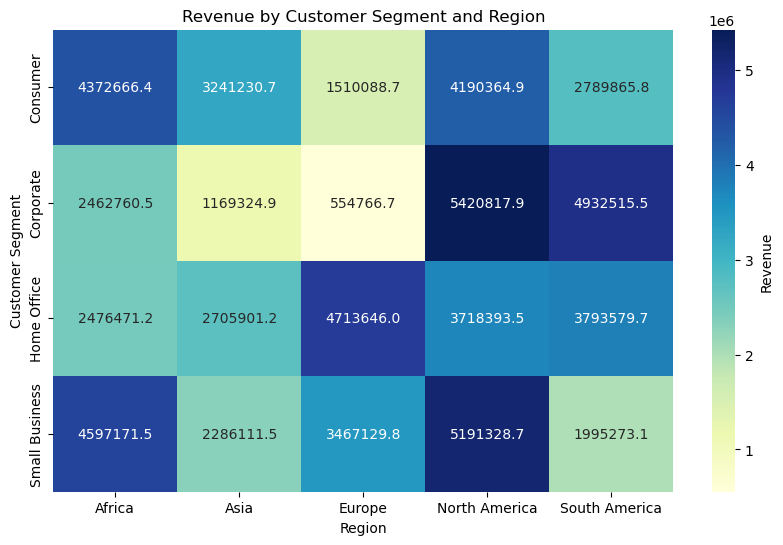

In [205]:
plt.figure(figsize=(10,6))
sns.heatmap(revenue_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={"label": "Revenue"})
plt.title("Revenue by Customer Segment and Region")
plt.xlabel("Region")
plt.ylabel("Customer Segment")
plt.show()
# annot=True: Shows revenue values in each cell.
# fmt=".1f": Sets number formatting to one decimal point.
# cmap="YlGnBu": Uses a yellow-green-blue color map for visual contrast.
# cbar_kws={'label': 'Revenue'}: Labels the color bar to indicate revenue values.            
            

In [30]:
avg_profit_segment_AM = pd.pivot_table(merged_df, values="Profit", index="Customer_Segment", columns = "Account_Manager", aggfunc="mean")
display(avg_profit_segment_AM)

Account_Manager,Manager A,Manager B,Manager C
Customer_Segment,,,
Consumer,10753.526471,10199.598202,11208.439895
Corporate,11286.836349,15966.130909,10511.973028
Home Office,12002.331026,10285.431100,11728.198765
Small Business,11099.780000,11967.519646,12963.659091


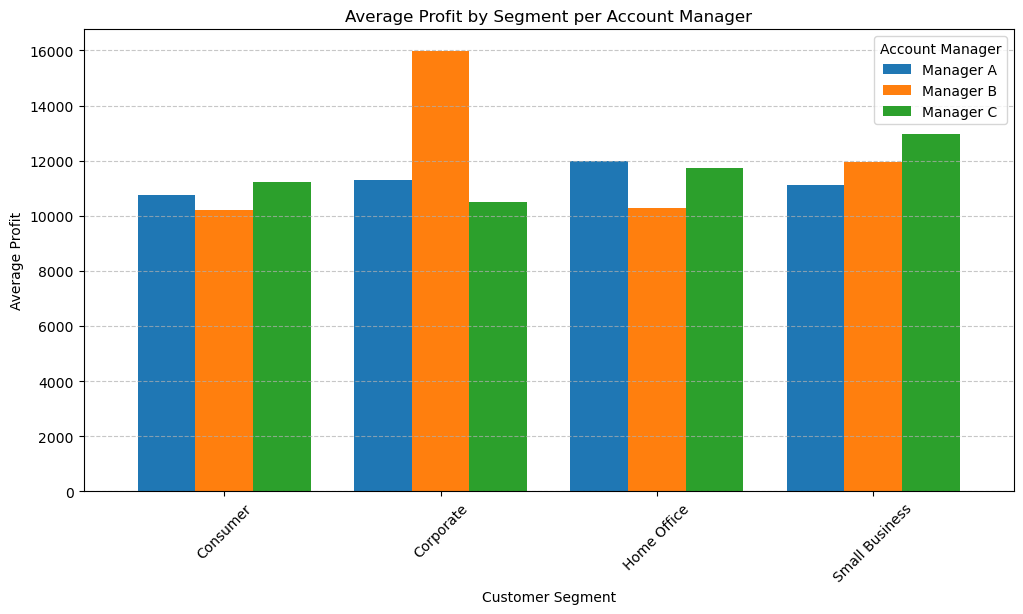

In [215]:
avg_profit_segment_AM.plot(kind="bar", figsize=(12,6), width=0.8)
plt.title("Average Profit by Segment per Account Manager")
plt.xlabel("Customer Segment")
plt.ylabel("Average Profit")
plt.xticks(rotation=45)
plt.legend(title="Account Manager")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [32]:
display(merged_df.head())       

,Product_ID,Product_Name,Category,Subcategory,Region_sales,Country,Units_Sold,Revenue,Profit,Order_Date,Ship_Date,Customer_ID,Customer_Name,Customer_Segment,Region_customer,Customer_Satisfaction,Account_Manager
0,P0001,Product 1,Office Supplies,Paper,North America,Mexico,141,18330.00,1555.93,2023-02-22,2023-03-05,CUST095,Customer 95,Home Office,Europe,3,Manager C
1,P0002,Product 2,Office Supplies,Paper,Africa,South Africa,17,418.20,43.77,2023-09-16,2023-09-26,CUST004,Customer 4,Small Business,Asia,2,Manager C
2,P0003,Product 3,Office Supplies,Paper,Africa,South Africa,113,26002.43,3108.53,2023-01-04,2023-01-17,CUST021,Customer 21,Small Business,Asia,4,Manager C
3,P0004,Product 4,Office Supplies,Binders,Asia,Japan,80,9240.00,2225.67,2023-02-22,2023-02-24,CUST049,Customer 49,Home Office,North America,4,Manager C
4,P0005,Product 5,Electronics,Laptops,Asia,India,136,55146.64,12817.90,2023-10-02,2023-10-04,CUST049,Customer 49,Home Office,North America,4,Manager C


In [46]:
cross_tab = pd.crosstab(merged_df["Customer_Segment"], merged_df["Region_customer"])
cross_tab_w_totals = pd.crosstab(merged_df["Customer_Segment"], merged_df["Region_customer"], margins=True)
display(cross_tab)

Region_customer,Africa,Asia,Europe,North America,South America
Customer_Segment,,,,,
Consumer,73,63,28,64,41
Corporate,42,19,7,81,67
Home Office,38,43,65,56,57
Small Business,58,34,56,84,24


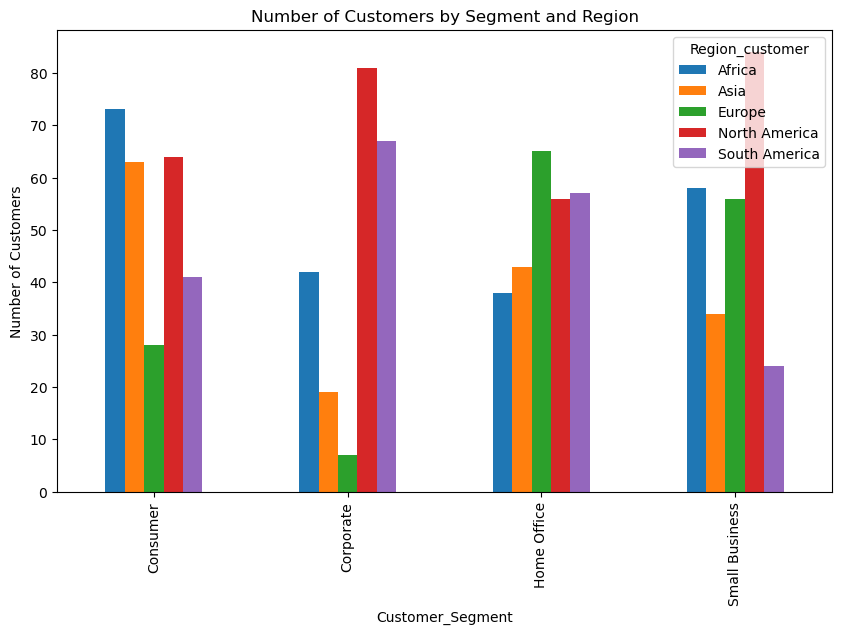

In [52]:
cross_tab.plot(kind="bar", figsize=(10,6))
plt.title("Number of Customers by Segment and Region")
plt.ylabel("Number of Customers")
plt.show()